In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import time
warnings.filterwarnings('ignore')
import time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline

In [3]:
from scipy.integrate import simps

In [4]:
NAX = np.newaxis

In [5]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [11]:
cd /home/g.samarth/dopplervel2

/home/g.samarth/dopplervel2


In [ ]:
from inversion import gen_leg

In [7]:
def get_ellemmArr(lmax):
    maxIndex = int((lmax+1)*(lmax+2)/2)
    ellArr = np.zeros(maxIndex); emmArr = np.zeros(maxIndex)
    countl, countm = 0, 0
    for i in range(maxIndex):
        ellArr[i] = countl
        emmArr[i] = countm
        if countm == countl:
            countl += 1
            countm = 0
        else:
            countm += 1
    return ellArr, emmArr

In [8]:
lmax = 5
th = np.linspace(np.pi/37, np.pi - np.pi/37, 360)
ph = np.linspace(1e-5, 2*np.pi-1e-5, 720)
vth = (np.sin(th)**2)[:, NAX] * (np.cos(2*ph))[NAX, :]
div_vth = (3*np.sin(th)*np.cos(th))[:, NAX] * (np.cos(2*ph))[NAX, :]
leg, dt_leg, dp_leg = gen_leg(lmax, th)
ellArr, emmArr = get_ellemmArr(lmax)
eimp = np.exp(1j*emmArr[:, NAX, NAX]*ph[NAX, NAX, :])

NameError: name 'gen_leg' is not defined

In [69]:
Ylm = leg[:, :, NAX] * eimp
dtYlm = dt_leg[:, :, NAX] * eimp
dpYlm = dp_leg[:, :, NAX] * eimp

In [84]:
vlm = simps(simps(vth[NAX, :, :]*(dtYlm.conj() - dpYlm.conj())*np.sin(th)[NAX, :, NAX], axis=1, x=th), axis=1, x=ph)
vlm2 = simps(simps(vth[NAX, :, :]*np.sin(th)[NAX, :, NAX]*Ylm.conj(), axis=1, x=th), axis=1, x=ph)

In [90]:
div_vth_lm = (ellArr*(ellArr+1))**1.5*vlm
div_vth2 = (div_vth_lm[:, NAX, NAX] * Ylm).sum(axis=0)

In [97]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(div_vth.real)
plt.subplot(122)
plt.plot(div_vth2.real)
plt.show(fig)
print((abs(div_vth) - abs(div_vth2)).max(), div_vth.max())

RuntimeError: Failed to process string with tex because dvipng could not be found

<Figure size 432x288 with 2 Axes>

-0.22492371921836996 1.4999705379194972


In [95]:
fig = plt.figure()
plt.plot(div_vth[:, 0], 'b')
plt.plot(div_vth2[:, 0], 'r')
plt.show(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
run vecdoppler_combined.py

lmax_inv = 1535
-- Computing FFT of inverted data ..
-- Computing FFT of LCT data ..
 == Plotting for var_not_summed = t == 


KeyboardInterrupt: 

lmax_inv = 1535
1. Loading inverted data...
  total count = 8
2. Loading LCT data...
  total count = 8


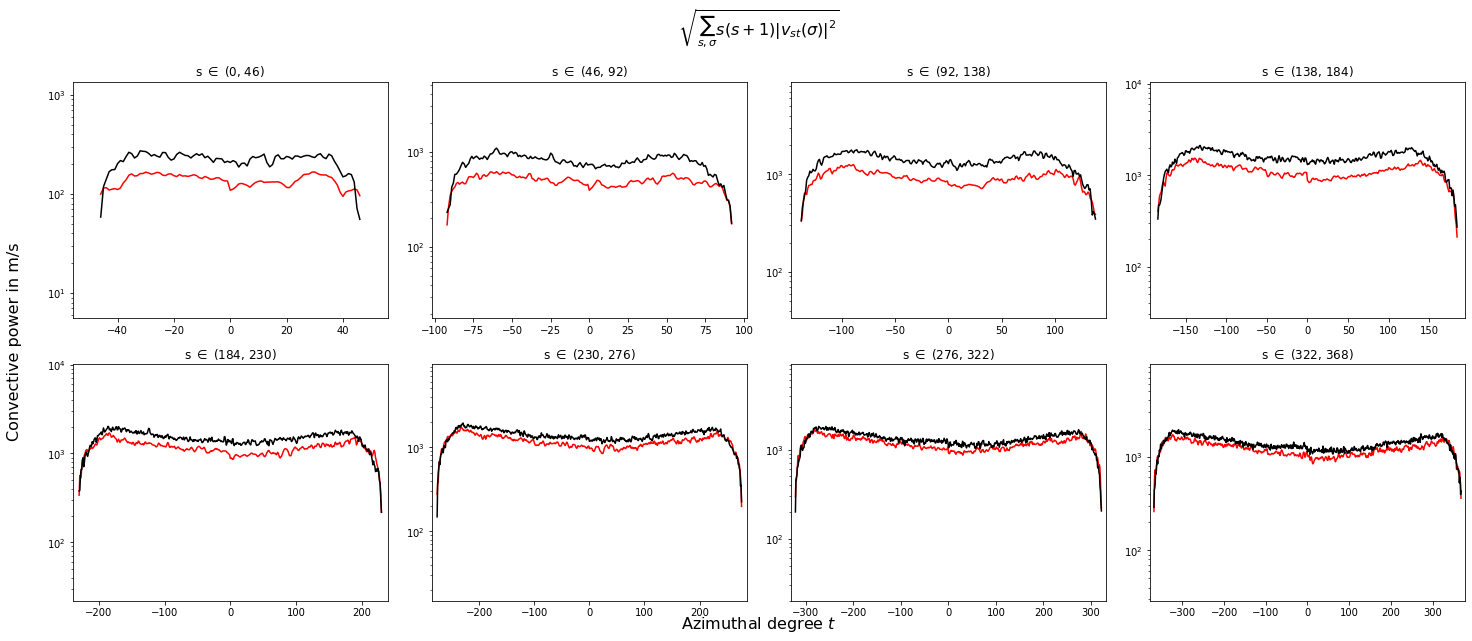

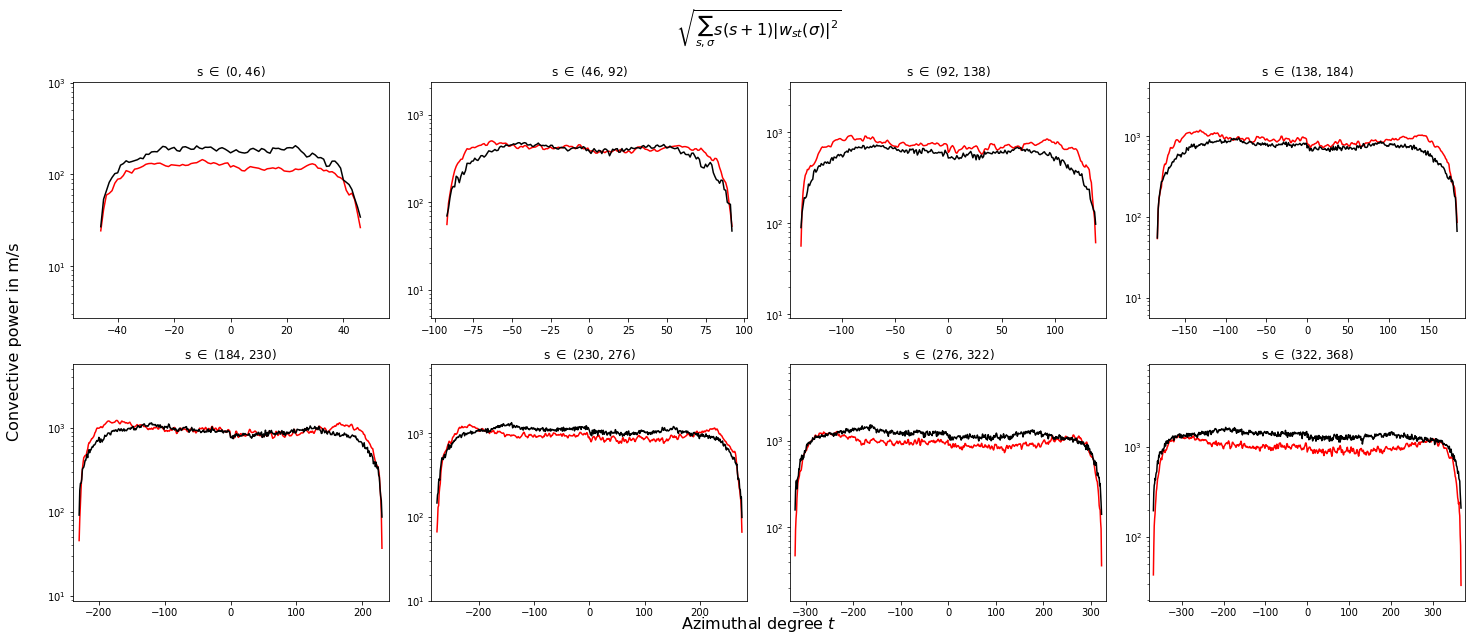

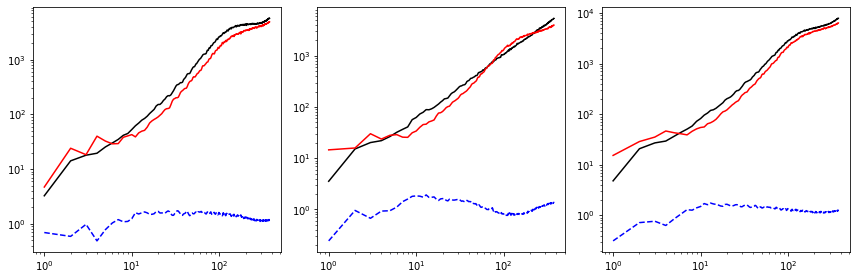

In [4]:
run vecdoppler_ts.py

In [ ]:
from progress.bar import ChargingBar
bar = ChargingBar('asdf', max=50000000)
for i in range(500000):
    bar.next()
bar.finish()

In [ ]:
masknan = ~np.isnan(v_blocks[0, :])
abs(v_blocks[0, masknan]).max()

In [ ]:
run lct_process --year 2011 --daynum 1

In [ ]:
run hathaway.py --gnup 15

In [ ]:
run data_analysis.py --cchpc --gnup 15

In [ ]:
run inversion.py --cchpc --gnup 15

In [ ]:
run rotation.py --gnup 15

In [ ]:
run compare_3_methods

In [ ]:
plt.figure()
plt.plot(u_by_tot[:1500])
plt.show()

In [ ]:
run time_series --cchpc

In [ ]:
plt.close('all')
plt.figure()
plt.plot(np.random.rand(10))
plt.xlabel('$\int dx f(x) a$')
plt.show()

In [ ]:
cont = np.exp(-(xarr-xarr[gridi_min, 0])**2/0.5**2) * np.exp(-(yarr-yarr[0, gridj_min])**2/5**2)
prob_dist = np.exp(-(msft+msft_min)**2)
px = simps(prob_dist, axis=1, x=xarr)
plt.figure()
im = plt.pcolormesh(xarr, yarr, prob_dist/prob_dist.max(), vmax=1)
cbar = plt.colorbar(im)
plt.show()
print(f"max = {cont.max()}, min = {cont.min()}")

In [ ]:
ulm_hath = np.loadtxt("/scratch/g.samarth/dopplervel/datafiles/green.csv", delimiter=",")
vlm_hath = np.loadtxt("/scratch/g.samarth/dopplervel/datafiles/red.csv", delimiter=",")
wlm_hath = np.loadtxt("/scratch/g.samarth/dopplervel/datafiles/blue.csv", delimiter=",")

plt.figure()
plt.loglog(ulm_hath[:, 0], ulm_hath[:, 1], 'g')
plt.loglog(vlm_hath[:, 0], vlm_hath[:, 1], 'r')
plt.loglog(wlm_hath[:, 0], wlm_hath[:, 1], 'b')
plt.show()

In [ ]:
ulm_hath[:, 1]

In [ ]:
run magneto_compare.py

In [ ]:
plot_inv_actual(psvel, psvel, np.arange(lmax), 0)

In [ ]:
lct_alm = np.load("/scratch/g.samarth/HMIDATA/LCT/almo.npz")
lct_arrlm = np.load("/scratch/g.samarth/HMIDATA/LCT/arrlm.npz")
lct_vlm, lct_wlm = lct_alm['vlm'], lct_alm['wlm']
lct_ell, lct_emm = lct_arrlm['ellArr'], lct_arrlm['emmArr']
psv_lct = computePS(lct_vlm, 1, lct_ell.max(), lct_ell, lct_emm)
psw_lct = computePS(lct_wlm, 1, lct_ell.max(), lct_ell, lct_emm)

alm = np.load(f"{magdir}/lmax1535/alm.data.inv.final313.npz")
vlm, wlm = alm['vlm'], alm['wlm']
del alm
ellArr, emmArr = hp.sphtfunc.Alm.getlm(hp.sphtfunc.Alm.getlmax(len(ulm)))
lmax = 1535
psv = computePS(vlm, 1, lmax, ellArr, emmArr)
psw = computePS(wlm, 2, lmax, ellArr, emmArr)



In [ ]:
ell_lct = np.arange(len(psv_lct))
ell = np.arange(len(psv))
ell_lct[0], ell[0] = 1, 1

plt.figure(figsize=(7 ,3))
plt.subplot(121)
plt.loglog(psv_lct*np.sqrt(2)/np.sqrt(ell_lct+1), 'r', label='poloidal - LCT')
plt.loglog(psv*np.sqrt(2)*2/np.sqrt(ell+1), '--', color='black', alpha=0.5, label='poloidal - inv')
plt.loglog(vlm_hath[:, 0], vlm_hath[:, 1], '-.', alpha=0.5, label='poloidal - hathaway')
plt.legend()

plt.subplot(122)
plt.loglog(psw_lct*np.sqrt(2)/np.sqrt(ell_lct+1), 'b', label='toroidal - LCT')
plt.loglog(psw*np.sqrt(2)*2/np.sqrt(ell+1), '--', color='black', alpha=0.5, label='toroidal - inv')
plt.loglog(wlm_hath[:, 0], wlm_hath[:, 1], '-.', alpha=0.5, label='poloidal - hathaway')
plt.legend()
plt.show()

plt.figure(figsize=(7 ,4))
plt.loglog(np.sqrt(psv_lct**2 + psw_lct**2)*np.sqrt(2), 'r', label='horizontal - LCT')
plt.loglog(np.sqrt(psv**2 + psw**2)*np.sqrt(2)*2, '--', color='black', alpha=0.5, label='horizontal - inv')
plt.legend()
plt.show()

In [ ]:
# {{{ def plot_inv_actual(inv, act, ell, args):
def plot_inv_actual(inv, act, ell, args):
    if rempel:
        yaxis_label = "Magnetic field in G"
        title_suffix = "magnetic field"
    else:
        yaxis_label = "Velocity in m/s"
        title_suffix = "velocity"
    inv_total = np.sqrt(inv[0]**2 + inv[1]**2 + inv[2]**2)
    act_total = np.sqrt(act[0]**2 + act[1]**2 + act[2]**2)
    fig = plt.figure(figsize=(10, 10))
    plt.rcParams.update({'font.size': 15})
    plt.subplot(221)
    plt.xlabel("Spherical harmonic degree $l$")
    plt.ylabel(yaxis_label)
    ts2 = "$\sqrt{\sum_s |B^r_{st}|^2}$" if rempel else \
        "$\sqrt{\sum_s |u_{st}|^2}$"
    plt.title(f"Radial {title_suffix}: " + ts2)
    plt.loglog(inv[0], 'g-.', label='inverted from LOS')
    if rempel:
        plt.loglog(act[0], 'g', label='actual')
        plt.legend()

    plt.subplot(222)
    ts2 = "$\sqrt{\sum_s s(s+1) |B^p_{st}|^2}$" if rempel else \
        "$\sqrt{\sum_s s(s+1) |v_{st}|^2}$"
    plt.title(f"Poloidal {title_suffix}: " + ts2)
    plt.xlabel("Spherical harmonic degree $l$")
    plt.ylabel(yaxis_label)
    plt.loglog(inv[1], 'r-.', label='inverted from LOS')
    if rempel:
        plt.loglog(act[1], 'r', label='actual')
        plt.legend()

    plt.subplot(223)
    ts2 = "$\sqrt{\sum_s s(s+1) |B^t_{st}|^2}$" if rempel else \
        "$\sqrt{\sum_s s(s+1) |w_{st}|^2}$"
    plt.title(f"Toroidal {title_suffix}: " + ts2)
    plt.xlabel("Spherical harmonic degree $l$")
    plt.ylabel(yaxis_label)
    plt.loglog(inv[2], 'b-.', label='inverted from LOS')
    if rempel:
        plt.loglog(act[2], 'b', label='actual')
        plt.legend()

    plt.subplot(224)
    plt.title(f"Total {title_suffix}")
    plt.xlabel("Spherical harmonic degree $l$")
    plt.ylabel(yaxis_label)
    plt.loglog(inv_total, color='black',
               linestyle='-.', label='inverted')
    if rempel:
        plt.loglog(act_total, 'black', label='actual')
        plt.legend()
    plt.tight_layout()
    return fig
# }}} plot_inv_actual(inv, act, ell, args)


# {{{ def computePS(alm, lmax, ellArr, emmArr):
def computePS(alm, comp, lmax, ellArr, emmArr):
    '''Computes the power spectrum given the spectral coefficients.

    Parameters:
    -----------
    alm - np.ndarray(ndim=1, dtype=complex)
        array of all spectral coefficients (upto lmax)
    lmax - int
        maximum spherical harmonic degree
    ellArr - np.ndarray(ndim=1, dtype=int)
        array containing ell
    emmArr - np.ndarray(ndim=1, dtype=int)
        array containing emm

    Returns:
    --------
    ps - np.ndarray(ndim=1, dtype=float)
        power spectrum

    Notes:
    ------
    The velocity power spectrum is given by ell * \sum_{m} | alm |^2

    '''
    ps = np.zeros(lmax)
    for i in range(lmax):
        isel = ellArr == i
        if comp == 0:
            ps[i] += (abs(alm[isel])**2).sum()
        else:
            ps[i] += (i*(i+1))*(abs(alm[isel])**2).sum()
    return np.sqrt(ps)
# }}} computePS(alm, lmax, ellArr, emmArr)


In [ ]:
run cs_fit_srijan.py --l 200 --l_ 202 --n 0 --n_ 0 --window --plot

In [ ]:
cd ~/Woodard2013/

In [ ]:
run compare_woodard.py

In [ ]:
run get_hathaway_maps.py

In [ ]:
run lct_process.py

In [ ]:
run compare_3_methods.py

In [ ]:
run compute_norms.py --l 200 --n 0 --force

In [ ]:
neg_m = emmArr<0
np.sum(neg_m)

In [ ]:
run get_vec_mag_spectra.py --gnup 20190502

In [ ]:
br = np.load("/scratch/g.samarth/HMIDATA/magnetogram/BrlmA.20190502.npy")
bt = np.load("/scratch/g.samarth/HMIDATA/magnetogram/BtlmA.20190502.npy")
bp = np.load("/scratch/g.samarth/HMIDATA/magnetogram/BplmA.20190502.npy")
arrlm = np.load("/scratch/g.samarth/HMIDATA/magnetogram/arrlm.npz")
ellArr, emmArr = arrlm['ellArr'], arrlm['emmArr']
print(f"lmax = {ellArr.max()}")
lmax = ellArr.max()
psr = np.zeros(lmax+1)
pst = np.zeros(lmax+1)
psp = np.zeros(lmax+1)
for i in range(lmax+1):
    elmas = ellArr==i
    psr[i] = i * (abs(br[elmas])**2).sum()
    pst[i] = i * (abs(bt[elmas])**2).sum()
    psp[i] = i * (abs(bp[elmas])**2).sum()
psr = np.sqrt(psr)
pst = np.sqrt(pst)
psp = np.sqrt(psp)
plt.figure()
plt.semilogy(psr, 'g')
plt.semilogy(psp, 'r')
plt.semilogy(pst, 'b')
plt.show()

In [ ]:
import healpy as hp
NSIDE = 512

In [ ]:
def rotate_map(hmap, rot_theta, rot_phi):
    """
    Take hmap (a healpix map array) and return another healpix map array 
    which is ordered such that it has been rotated in (theta, phi) by the 
    amounts given.
    """
    nside = hp.npix2nside(len(hmap))

    # Get theta, phi for non-rotated map
    t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

    # Define a rotator
    r = hp.Rotator(deg=False, rot=[rot_phi,rot_theta])

    # Get theta, phi under rotated co-ordinates
    trot, prot = r(t,p)

    # Interpolate map onto these co-ordinates
    rot_map = hp.get_interp_val(hmap, trot, prot)

    return rot_map

In [ ]:
alm = np.load("/scratch/g.samarth/HMIDATA/data_analysis/lmax1535/alm.data.inv.final018.npz")
ulm, slmp, slmm = alm['ulm'], alm['vlm'], alm['wlm']
ulm = hp.map2alm(hp.alm2map(ulm, NSIDE))
slmm = hp.map2alm(hp.alm2map(slmm, NSIDE))
slmp = hp.map2alm(hp.alm2map(slmp, NSIDE))
map1r = hp.sphtfunc.alm2map(ulm, NSIDE)
map1r = rotate_map(map1r, np.pi/2, np.pi)
hp.mollview(slmm, cmap='seismic')
#vlm, wlm = (slmp+slmm)/2, (slmp-slmm)/2
#vlm, wlm = slmp, slmm
#psv = np.zeros(lmax+1)
#psw = np.zeros(lmax+1)
#for i in range(lmax+1):
#    elmas = ellArr==i
#    psv[i] = i * (abs(vlm[elmas])**2).sum()
#    psw[i] = i * (abs(wlm[elmas])**2).sum()
#plt.figure()
#plt.loglog(np.sqrt(psv), 'r')
#plt.loglog(np.sqrt(psw), 'b')
#plt.show()

In [ ]:
run magneto_compare.py

In [ ]:
run compare_3_methods.py

In [ ]:
import matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

In [ ]:
run cs_fit_srijan.py --l 200 --l_ 200 --n 0 --n_ 0 --window --plot --gridi 25 --gridj 25 --Npoints 50

In [ ]:
plt.figure()
plt.plot(freq_window, real_data,'k',label='data',lw=1)
plt.plot(freq_window, synth_data*fac,'b',label='$c^i_j = \delta^i_j$',lw=1)
plt.plot(freq_window, synth_data2*1.1*fac,'r',label='using $c^i_j$',lw=1)
plt.legend()
plt.xlabel("Relative frequency in $\mu$ Hz")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
a_avg = np.zeros((4096, 4096))
masknan = np.ones((4096, 4096), dtype=np.bool)
count = 0
for i in range(320):
    try:
        a = np.load(f"/scratch/g.samarth/HMIDATA/v720s_dConS/2018/residual{i:03d}.pkl.npy")
        #masknan = masknan*(~np.isnan(a))
        a_avg += a
        del a
        count += 1
        #a_avg[masknan] += a[masknan]
        #print(f"max = {a_avg[masknan].max()}")
    except FileNotFoundError:
        pass
    if count>0 and count%10==0:
        a_avg /= (count*1.0)
        count = 1

plt.figure()
plt.imshow(a_avg, cmap='seismic')
plt.show()
    

In [ ]:
a = fits.open("/scratch/g.samarth/HMIDATA/v720s_dConS/2018/residual.fits")[0].data
plt.figure()
plt.imshow(a, cmap='seismic')
plt.show()

In [ ]:
run cs_fit_samarth.py --l 200 --l_ 200 --n 0 --n_ 0 --window --plot --gridi 25 --gridj 25 --Npoints 50

In [ ]:
plt.figure()
#plt.plot(freq_window, synth_data,'b',label='$c^i_j = \delta^i_j$',lw=1)
plt.plot(freq_window, synth_data2,'r',label='$c^i_j$ computed from splitting',lw=1)
plt.legend()
plt.show()


In [ ]:
maxind1 = np.argmax(synth_data)
maxind2 = np.argmax(real_data)
fac = real_data[maxind2]/synth_data[maxind1]
plt.figure()
plt.plot(freq_window+cenfreq,real_data,'k',label='data',lw=1)
plt.plot(freq_window+cenfreq, synth_data*fac,'b',label='Model',lw=1)
plt.xlabel("Frequency in $\mu$Hz")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [ ]:
cd ~/Woodard2013/


In [ ]:
run /scratch/g.samarth/csfit/200_200/plot_misfit.py --N 50 --fac 100

In [ ]:
iarr = np.arange(N)[:, np.newaxis]*np.ones(N, dtype=int)[np.newaxis, :]
jarr = np.arange(N)[np.newaxis, :]*np.ones(N, dtype=int)[:, np.newaxis]
jarr[masknan][274]

In [ ]:
level_num = 40
loglevels = np.linspace(-60, -5, level_num)
levels = -np.exp(np.flip(loglevels))
plt.figure(figsize=(5, 5))
im = plt.imshow(msft)
plt.colorbar(im)
plt.show()

In [ ]:
run /home/g.samarth/dopplervel2/magneto_compare.py

In [ ]:
t = np.arange(time_count)
freq = np.fft.fftfreq(len(t), d=24*60*60)*1e6

plt.figure()
plt.semilogy(freq, abs(Br_freq), 'g', label='radial')
plt.semilogy(freq, abs(Bp_freq), 'r', label='poloidal')
plt.semilogy(freq, abs(Bt_freq), 'b', label='toroidal')
plt.show()

In [ ]:
from sunpy.coordinates import frames
import astropy.units as u

In [ ]:
x, y = np.meshgrid(*[np.arange(v.value) for v in hmap.dimensions]) * u.pix
hpc_coords = hmap.pixel_to_world(x, y)
hpc_hc = hpc_coords.transform_to(frames.HeliographicStonyhurst)


In [ ]:
lat, lon = hpc_hc.lat, hpc_hc.lon

In [ ]:
masknan = ~np.isnan(lat)
print(f" max = {lon[masknan].max()}, min = {lon[masknan].min()}")

In [ ]:
rotmat = np.array([])

In [ ]:
maxlen = 27
ipvec = np.zeros((maxlen, 3, 1))
rotmat = np.random.rand(maxlen, 3, 3)
ipvec[:, 0, 0] = np.random.rand(maxlen)
ipvec[:, 1, 0] = np.random.rand(maxlen)
ipvec[:, 2, 0] = np.random.rand(maxlen)
print(f"rot = {rotmat.shape}, ipvec = {ipvec.shape}")
print(f"{ipvec.dot(rotmat.transpose(0, 2, 1)).shape}")

In [ ]:
run cs_fit_srijan.py --l 200 --l_ 200 --n 0 --n_ 0 --window --plot

In [ ]:
cd ~/Woodard2013/

In [ ]:
plt.figure()
plt.plot(np.random.rand(10))
plt.show()

In [ ]:
pwd

In [ ]:
cd ../dopplervel2/

In [ ]:
run get_hathaway_maps.py

In [ ]:
?hp.alm2map_spin

In [ ]:
import healpy as hp
NSIDE = 128
lmax = 3*NSIDE - 1
ellArr, emmArr = hp.sphtfunc.Alm.getlm(lmax)
npix = hp.nside2npix(NSIDE)


In [ ]:
def get_synth_maps():
    ulm_t1 = np.sqrt((np.random.rand(len(ellArr)) - 0.5 + 1j*(np.random.rand(len(ellArr)) - 0.5)) * (lmax**2 - (ellArr-50)**2))
    vlm_t1 = np.sqrt((np.random.rand(len(ellArr)) - 0.5 + 1j*(np.random.rand(len(ellArr)) - 0.5)) * (lmax**2*1.5 - (ellArr-50)**2))
    wlm_t1 = np.sqrt((np.random.rand(len(ellArr)) - 0.5 + 1j*(np.random.rand(len(ellArr)) - 0.5)) * (lmax**2*1.7 - (ellArr-50)**2))

    r_t1 = hp.alm2map(ulm_t1, NSIDE)
    ulm_t1_imag = hp.map2alm(r_t1.imag)
    ulm_t2 = ulm_t1 - 1j*ulm_t1_imag

    r1map = hp.alm2map(ulm_t2, NSIDE)
    r_map = hp.alm2map(hp.map2alm(r1map), NSIDE)

    hlmp_t1 = (vlm_t1 + 1j*wlm_t1)/np.sqrt(2)
    hlmm_t1 = (vlm_t1 - 1j*wlm_t1)/np.sqrt(2)
    t1map, p1map = hp.alm2map_spin((hlmp_t1, hlmm_t1), NSIDE, 1, lmax)

    hlmp_t1_imag, hlmm_t1_imag = hp.map2alm_spin((t1map.imag, p1map.imag), 1)
    hlmp = hlmp_t1 - 1j*hlmp_t1_imag
    hlmm = hlmm_t1 - 1j*hlmm_t1_imag

    t1map, p1map = hp.alm2map_spin((hlmm, hlmp), NSIDE, 1, lmax)
    h1map, h2map = hp.alm2map_spin(hp.map2alm_spin((t1map, p1map), 1), NSIDE, 1, lmax)
    return r_map, h1map, h2map

In [ ]:
rmap, tmap, pmap = get_synth_maps()

In [ ]:
rmap2 = hp.alm2map(hp.map2alm(rmap), NSIDE)
t2map, p2map = hp.alm2map_spin(hp.map2alm_spin((tmap, pmap), 1), NSIDE, 1, lmax)
hp.cartview(abs(t2map - tmap))
hp.cartview(abs(p2map - pmap))

In [ ]:
plt.semilogy((ulm.real - ulm2.real)/ulm.real, '.')